In [1]:
cd ..

/home/jovyan/Desktop/DSI/7-Week/Adult_practice


In [1]:
%run __init__.py

Exception: File `'__init__.py'` not found.

In [17]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats     # Calculos estadisticos que no proporciona numpy

In [6]:
adult_train_df = pd.read_pickle('../data/adult_train.p')

In [7]:
adult_train_stats_df = adult_train_df.describe().T
adult_train_stats_df

,count,mean,std,min,25%,50%,75%,max
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0


In [8]:
adult_train_stats_df.index

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week'],
      dtype='object')

In [11]:
skew_values = list()
for num_col in adult_train_stats_df.index:
    num_col_skew = stats.skew(adult_train_df[num_col])
    skew_values.append(num_col_skew)
adult_train_stats_df['skew'] = skew_values
adult_train_stats_df

,count,mean,std,min,25%,50%,75%,max,skew
age,32561.0,38.581647,13.640433,17.0,28.0,37.0,48.0,90.0,0.558718
fnlwgt,32561.0,189778.366512,105549.977697,12285.0,117827.0,178356.0,237051.0,1484705.0,1.446913
education-num,32561.0,10.080679,2.572720,1.0,9.0,10.0,12.0,16.0,-0.311662
capital-gain,32561.0,1077.648844,7385.292085,0.0,0.0,0.0,0.0,99999.0,11.953297
capital-loss,32561.0,87.303830,402.960219,0.0,0.0,0.0,0.0,4356.0,4.594417
hours-per-week,32561.0,40.437456,12.347429,1.0,40.0,40.0,45.0,99.0,0.227632


### Distribution Plots for Numerical Features

D:\Personal\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Personal\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
D:\Personal\Anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

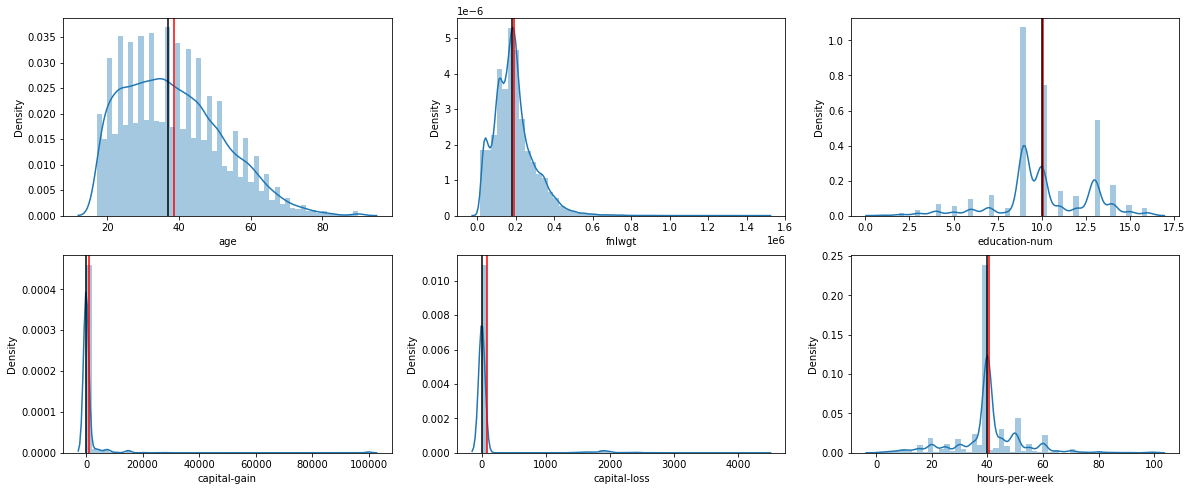

In [19]:
fig = plt.figure(figsize=(20,8))

for i, num_col in enumerate(adult_train_stats_df.index):
    fig.add_subplot(2,3,1+i)
    sns.distplot(adult_train_df[num_col])
    
    mean_value = adult_train_df[num_col].mean()
    plt.axvline(mean_value, c='red')
    
    median_value = adult_train_df[num_col].median()
    plt.axvline(median_value, c='black')

In [13]:
(adult_train_df['capital-gain'] > 99998).sum()

159

### Plots for Categorical Features

In [20]:
num_features_index = adult_train_stats_df.index

In [21]:
num_features_index, adult_train_df.columns

(Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
        'hours-per-week'],
       dtype='object'),
 Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
        'marital-status', 'occupation', 'relationship', 'race', 'sex',
        'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
        'class'],
       dtype='object'))

In [22]:
cat_features_list = [col for col in adult_train_df.columns if col not in num_features_index]
cat_features_list

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native-country',
 'class']

### `workclass` subplot

D:\Personal\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


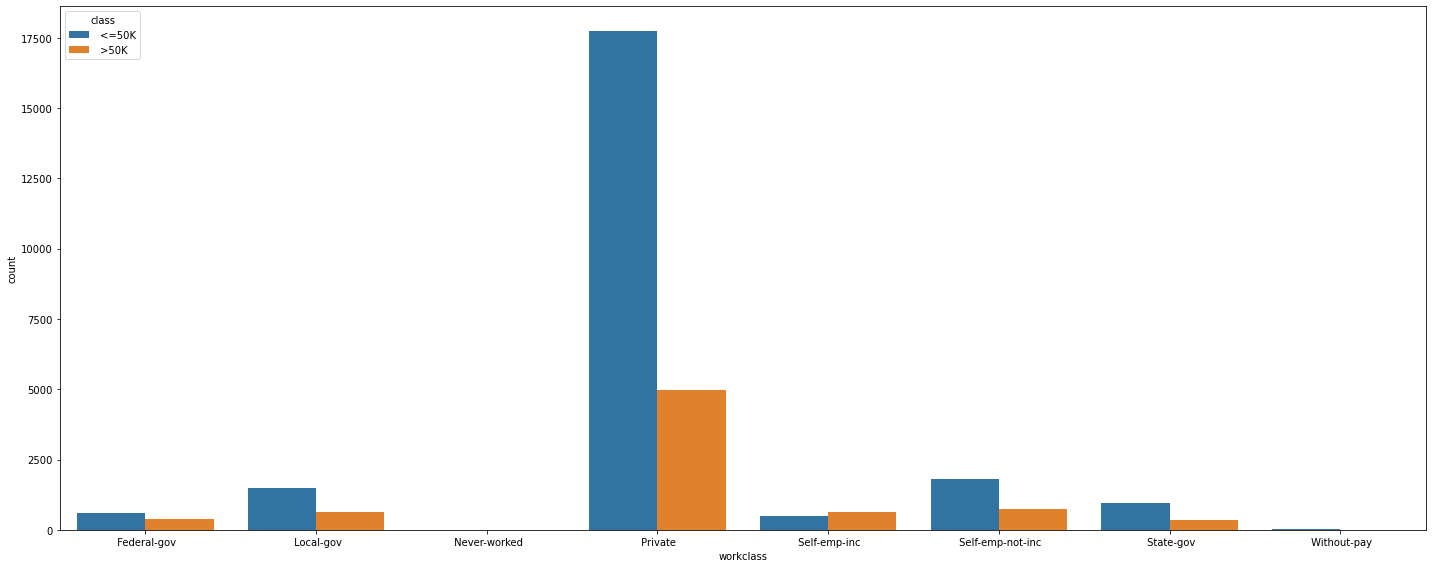

In [23]:
fig = plt.figure(figsize =  (20,8))
sns.countplot('workclass', hue = 'class', data = adult_train_df)
plt.tight_layout()

### `education` subplot

D:\Personal\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


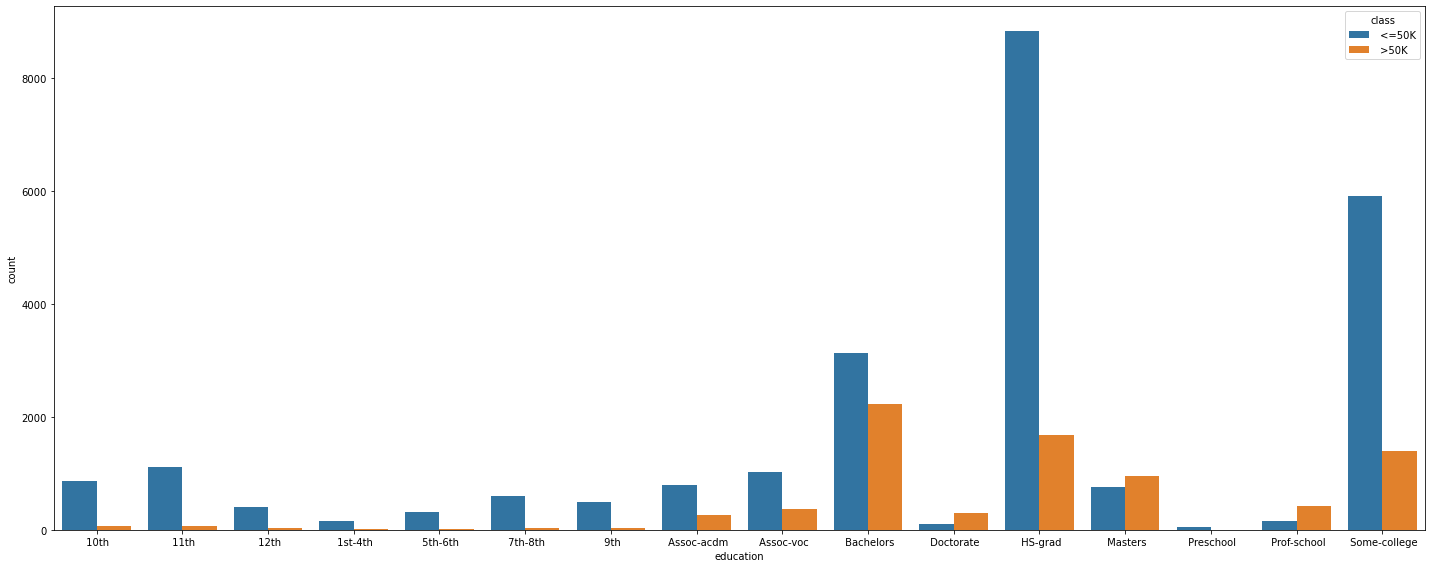

In [24]:
fig = plt.figure(figsize =  (20,8))
sns.countplot('education', hue = 'class', data = adult_train_df)
plt.tight_layout()

### `marital-status` subplot

D:\Personal\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


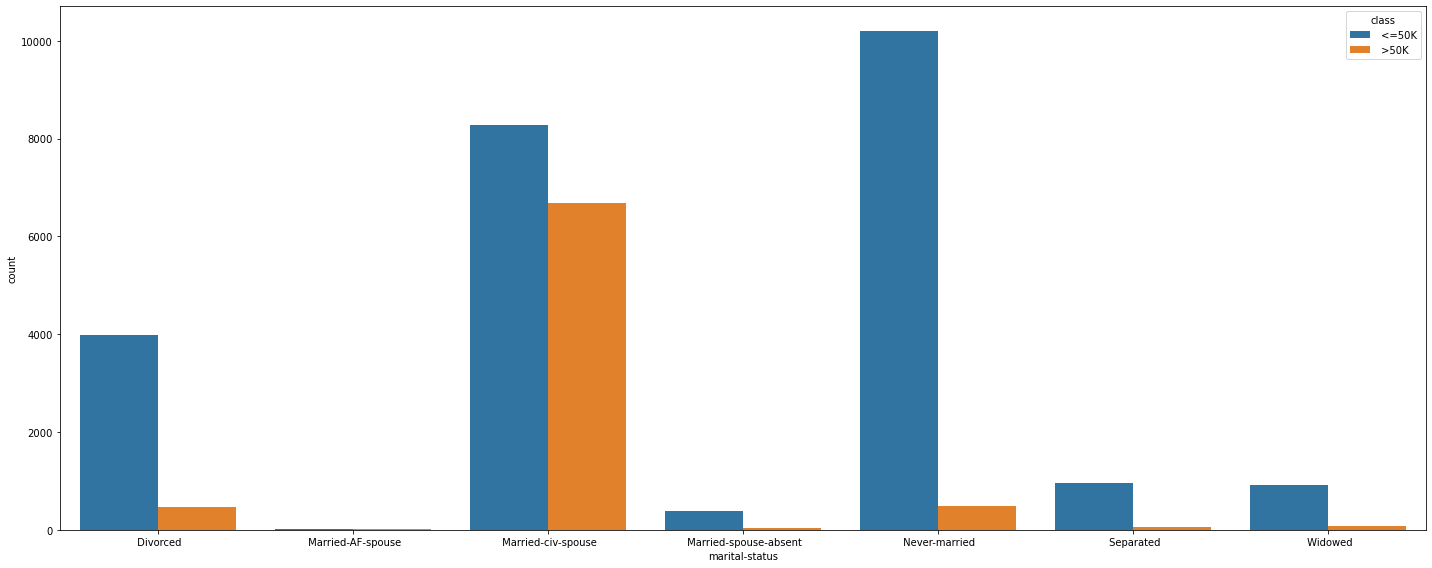

In [25]:
fig = plt.figure(figsize = (20,8))
sns.countplot('marital-status', hue = 'class', data = adult_train_df)
plt.tight_layout()

### `occupation` subplot

D:\Personal\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


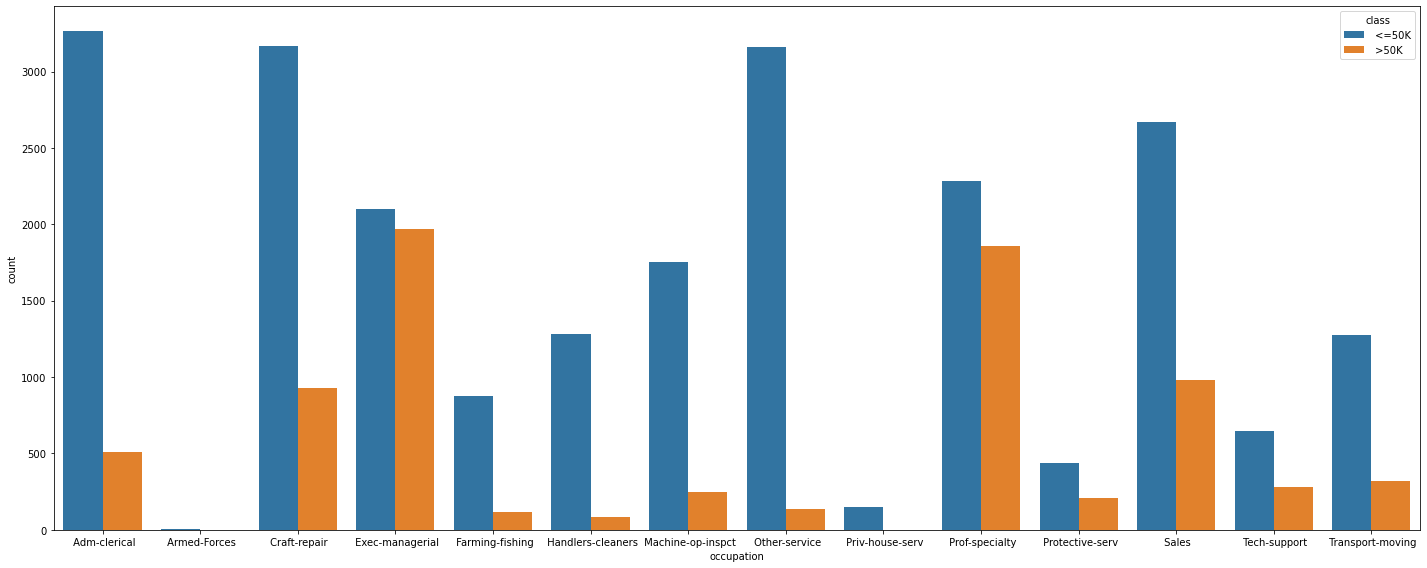

In [26]:
fig = plt.figure(figsize = (20,8))
sns.countplot('occupation', hue = 'class', data = adult_train_df)
plt.tight_layout()

### `relationship` subplot

D:\Personal\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


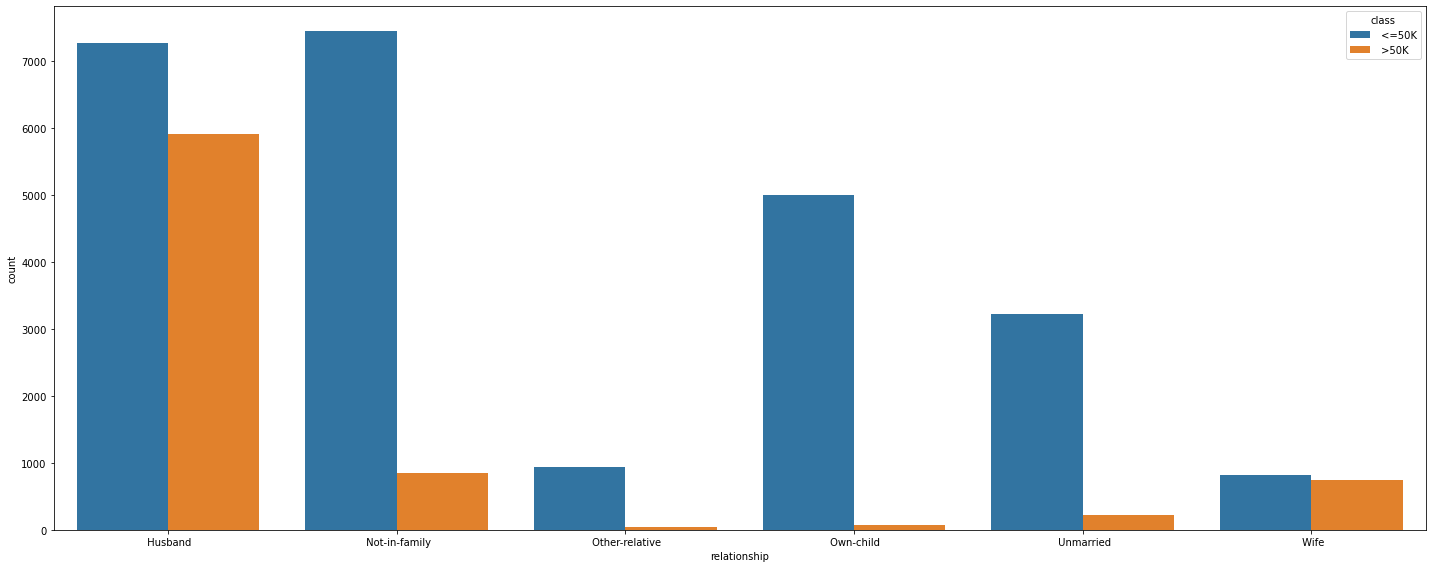

In [27]:
fig = plt.figure(figsize = (20,8))
sns.countplot('relationship', hue = 'class', data = adult_train_df)
plt.tight_layout()

### `race` subplot

D:\Personal\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


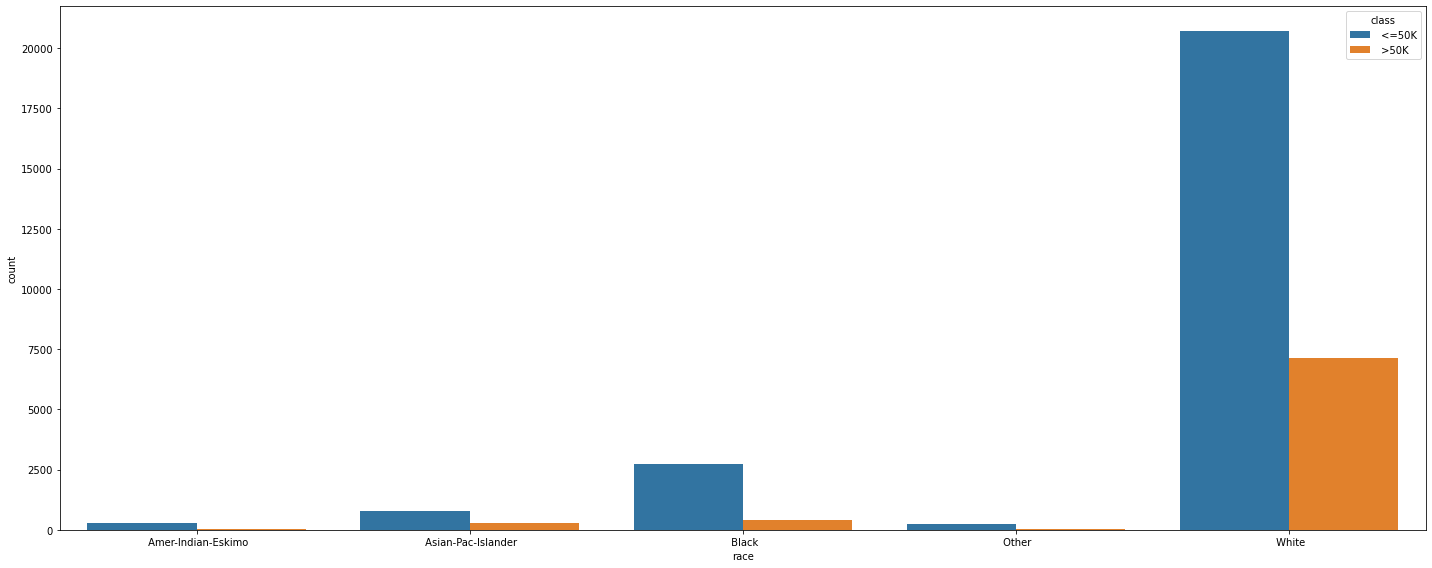

In [28]:
fig = plt.figure(figsize = (20,8))
sns.countplot('race', hue = 'class', data = adult_train_df)
plt.tight_layout()

### `sex` subplot

D:\Personal\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


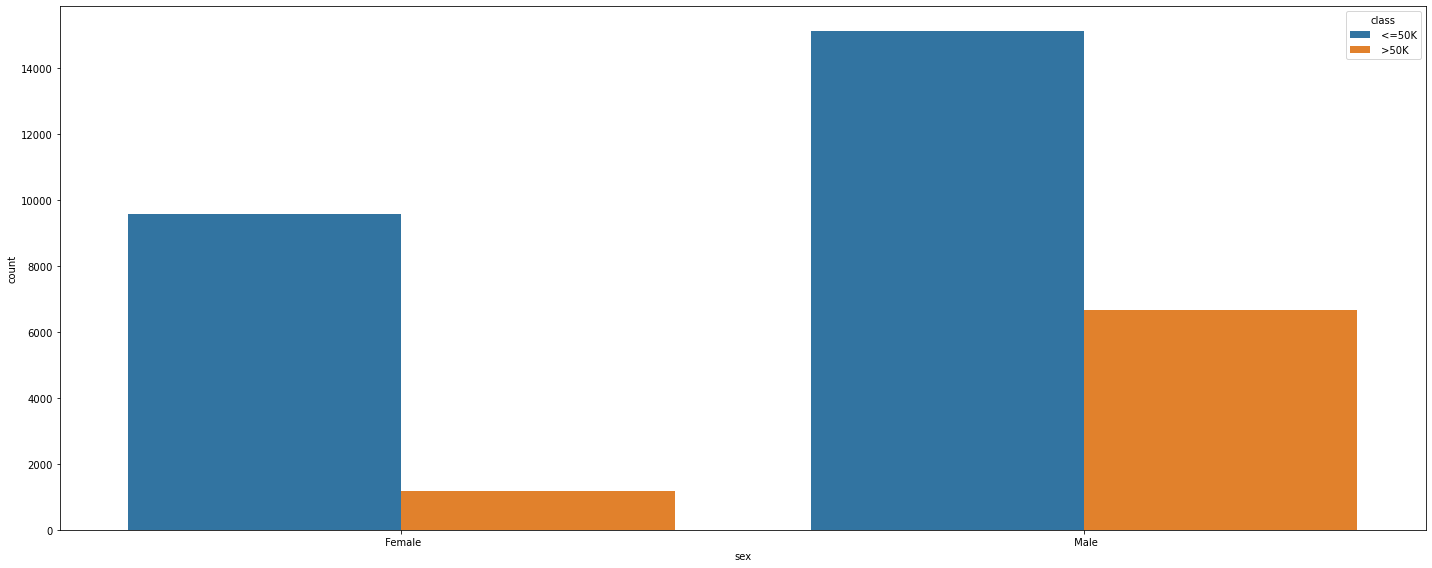

In [29]:
fig = plt.figure(figsize = (20,8))
sns.countplot('sex', hue = 'class', data = adult_train_df)
plt.tight_layout()

### `native-country` subplot

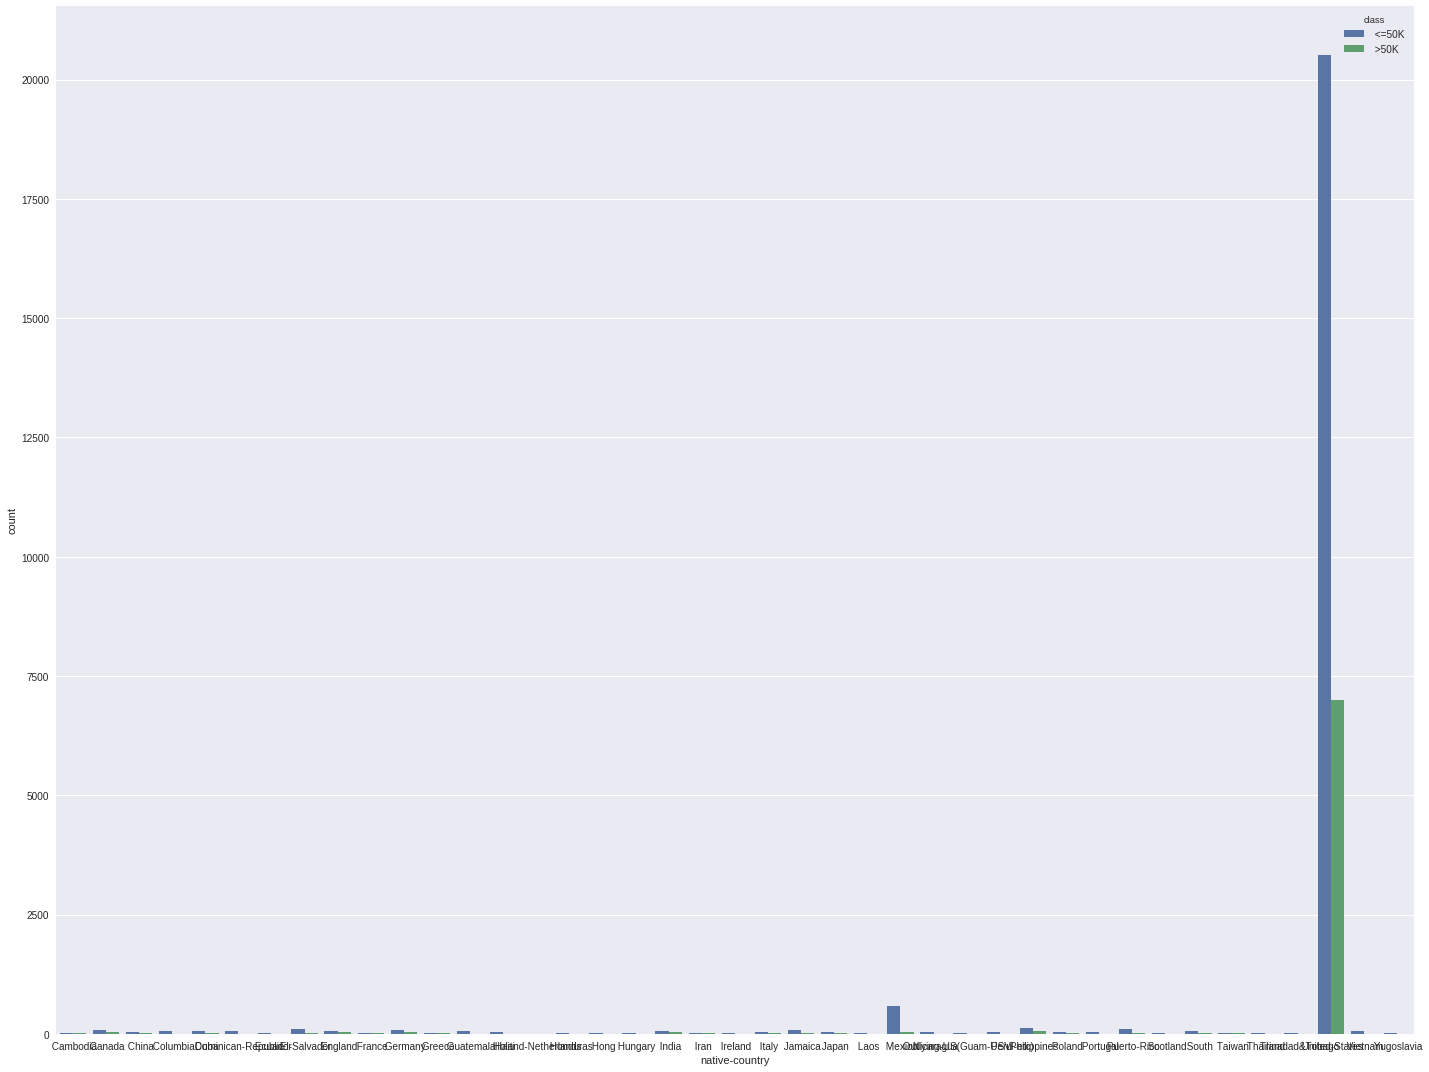

In [64]:
fig = plt.figure(figsize = (20,15))
sns.countplot('native-country', hue = 'class', data = adult_train_df)
plt.tight_layout()

### `class` subplot

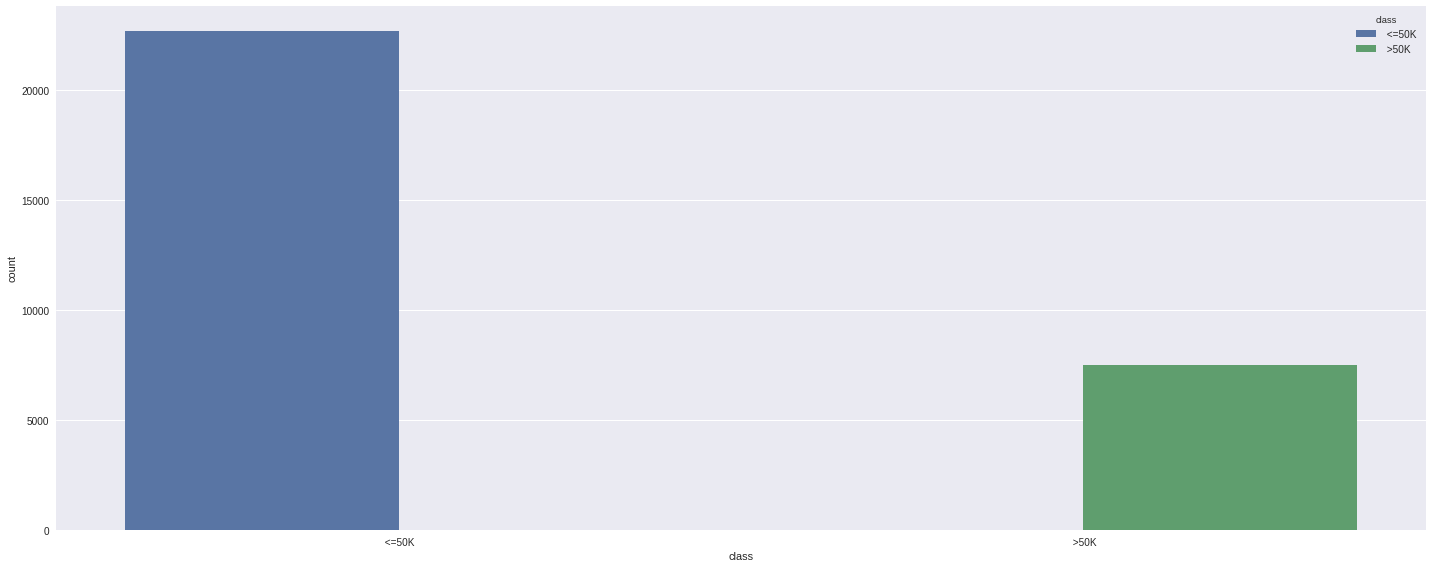

In [65]:
fig = plt.figure(figsize = (20,8))
sns.countplot('class', hue = 'class', data = adult_train_df)
plt.tight_layout()